**Varsha Yarram and Michelle Phan**

Fall 2024

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [8]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4AccelV2

#### Experimenting with different kernel sizes.

In [10]:
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)


Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)


In [12]:
def plot_weights(wts, saveFig=True, filename='convWts.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(5,5))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    if saveFig:
        plt.savefig(filename)
    plt.show()

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3081103445996716
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  0.041849613189697266
Iteration 0 , Loss:  1.9295604157803026
Training accuracy:  0.15 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  0.03947091102600098
Iteration 0 , Loss:  2.2174437842863197
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  0.03985857963562012
Iteration 0 , Loss:  1.23663895771278
Training accuracy:  0.35 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.04309988021850586
Iteration 0 , Loss:  1.2583930304031814
Training accuracy:  0.45 ; Validation accuracy:  1.0
Run time of interation 0 of epoch 4 in seconds:  0.043006181716918945
Iteration 0 , Loss:  1.2543731646388385
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in s

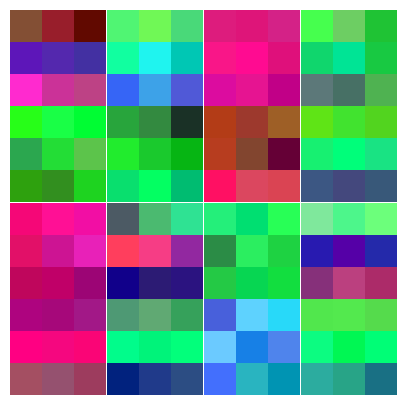

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3047034299901905
Training accuracy:  0.25 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  0.10588407516479492
Iteration 0 , Loss:  1.516237095227767
Training accuracy:  0.3 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  0.09474015235900879
Iteration 0 , Loss:  1.5035325359406486
Training accuracy:  0.55 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 2 in seconds:  0.16724658012390137
Iteration 0 , Loss:  1.936879082596296
Training accuracy:  0.3 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.12019014358520508
Iteration 0 , Loss:  2.2492901882979526
Training accuracy:  0.45 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  0.342818021774292
Iteration 0 , Loss:  1.4268587300203044
Training accuracy:  0.4 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in seconds

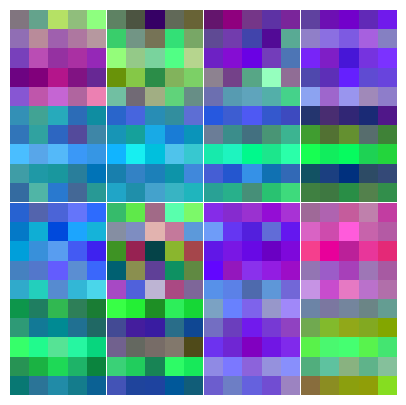

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3018007641695624
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.1399979591369629
Iteration 0 , Loss:  2.31931986480912
Training accuracy:  0.15 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  0.14325356483459473
Iteration 0 , Loss:  2.28092316003049
Training accuracy:  0.35 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  0.15394854545593262
Iteration 0 , Loss:  1.6937152585362656
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.1421959400177002
Iteration 0 , Loss:  1.397098914184013
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  0.15006732940673828
Iteration 0 , Loss:  1.066950282182559
Training accuracy:  0.65 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 5 in seconds:  

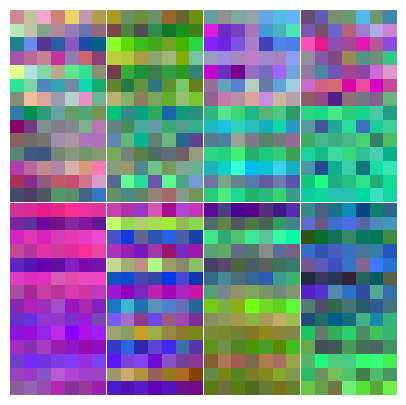

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.2946434815863013
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.2605552673339844
Iteration 0 , Loss:  2.7143900055929806
Training accuracy:  0.3 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  0.3179757595062256
Iteration 0 , Loss:  2.02975999275916
Training accuracy:  0.45 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  0.2580444812774658
Iteration 0 , Loss:  1.8033120787197316
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.21524906158447266
Iteration 0 , Loss:  1.0940506300379593
Training accuracy:  0.6 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  0.27149081230163574
Iteration 0 , Loss:  3.3380294274307096
Training accuracy:  0.6 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 5 in seconds: 

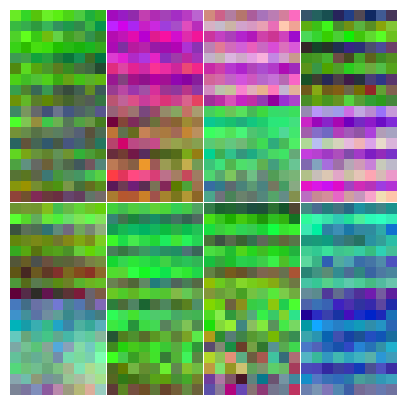

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3088467898141816
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.21551132202148438
Iteration 0 , Loss:  4.700756213307178
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  0.19768428802490234
Iteration 0 , Loss:  2.984930227641286
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 2 in seconds:  0.20926737785339355
Iteration 0 , Loss:  1.9399047570502495
Training accuracy:  0.45 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.25053858757019043
Iteration 0 , Loss:  1.4817484677552142
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  0.29207372665405273
Iteration 0 , Loss:  1.1285570706484076
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in seco

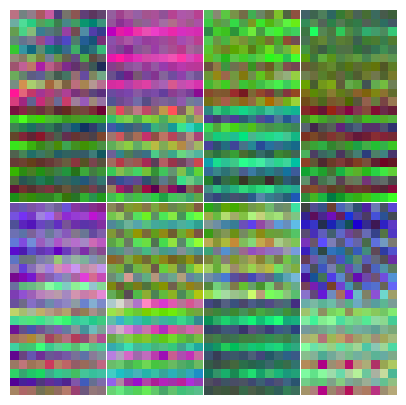

In [26]:
net1 = ConvNet4AccelV2(input_shape=(3, 32, 32), ker_sz=(3,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net1.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam1, train_acc_history_adam1, val_acc_adam1 = net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net1.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters1.png')

net2 = ConvNet4AccelV2(input_shape=(3, 32, 32), ker_sz=(5,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net2.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam2, train_acc_history_adam2, val_acc_adam2 = net2.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net2.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters2.png')

net3 = ConvNet4AccelV2(input_shape=(3, 32, 32), ker_sz=(7,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net3.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam3, train_acc_history_adam3, val_acc_adam3 = net3.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net3.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters3.png')

net4 = ConvNet4AccelV2(input_shape=(3, 32, 32), ker_sz=(9,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net4.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam4, train_acc_history_adam4, val_acc_adam4 = net4.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net4.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters4.png')

net5 = ConvNet4AccelV2(input_shape=(3, 32, 32), ker_sz=(11,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net5.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam5, train_acc_history_adam5, val_acc_adam5 = net5.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net5.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters5.png')



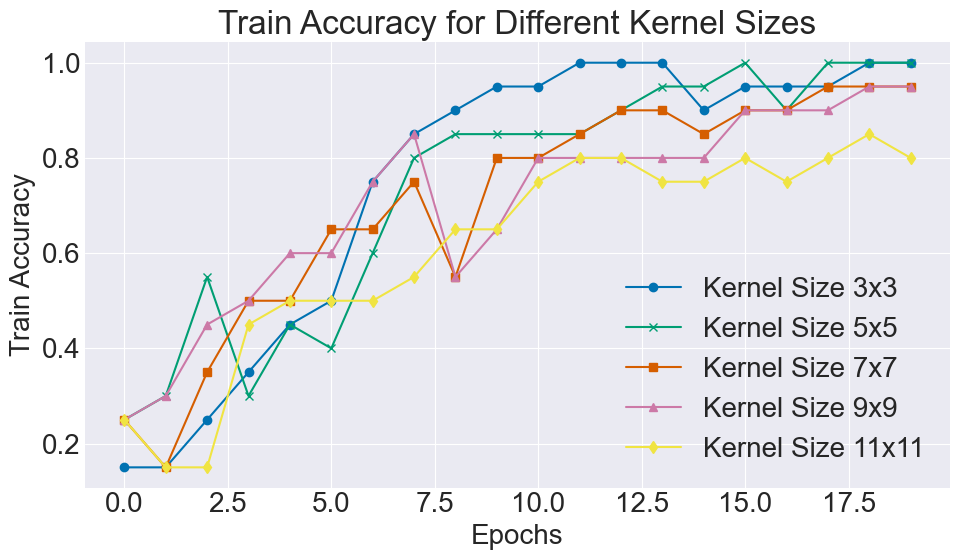

In [27]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the validation accuracy for each network
plt.plot(train_acc_history_adam1, label="Kernel Size 3x3", linestyle='-', marker='o')
plt.plot(train_acc_history_adam2, label="Kernel Size 5x5", linestyle='-', marker='x')
plt.plot(train_acc_history_adam3, label="Kernel Size 7x7", linestyle='-', marker='s')
plt.plot(train_acc_history_adam4, label="Kernel Size 9x9", linestyle='-', marker='^')
plt.plot(train_acc_history_adam5, label="Kernel Size 11x11", linestyle='-', marker='d')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy for Different Kernel Sizes')
plt.legend(loc='lower right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


The smaller kernel sizes seem to have better  accuracies than the larger ones (3x3 and 5x5 vs 9x9 and 11x11). The smaller kernels performing better may be  attributed to the fact that smaller kernels are more efficient at learning the finer, local features of the input data, leading to quicker convergence and better performance early on. The larger kernels also have slower improement and more fluctations which may imply they are more prone to overfitting. We also see more noise within the RGB plots.

#### Experimenting with different numbers of kernels.

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.303666805343642
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  0.04402279853820801
Iteration 0 , Loss:  3.211963223072162
Training accuracy:  0.3 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  0.045989036560058594
Iteration 0 , Loss:  2.206139944937655
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  0.04699540138244629
Iteration 0 , Loss:  2.3411711455561046
Training accuracy:  0.6 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.0534970760345459
Iteration 0 , Loss:  1.8918598840118392
Training accuracy:  0.5 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 4 in seconds:  0.05271196365356445
Iteration 0 , Loss:  1.5538131220050322
Training accuracy:  0.65 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 5 in second

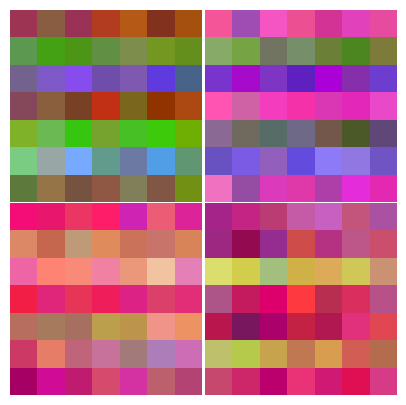

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3018007641695624
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.19209837913513184
Iteration 0 , Loss:  2.31931986480912
Training accuracy:  0.15 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  0.17551803588867188
Iteration 0 , Loss:  2.28092316003049
Training accuracy:  0.35 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  0.22048044204711914
Iteration 0 , Loss:  1.6937152585362656
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  0.18066072463989258
Iteration 0 , Loss:  1.397098914184013
Training accuracy:  0.5 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  0.16566133499145508
Iteration 0 , Loss:  1.066950282182559
Training accuracy:  0.65 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 5 in seconds:

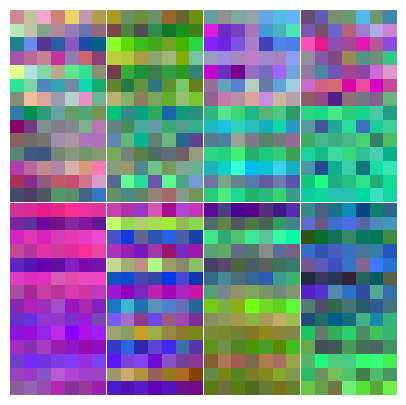

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3045144579236294
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.18799042701721191
Iteration 0 , Loss:  3.0764997316705704
Training accuracy:  0.2 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  0.23459887504577637
Iteration 0 , Loss:  2.4810586861609725
Training accuracy:  0.25 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 2 in seconds:  0.22553563117980957
Iteration 0 , Loss:  2.1101025514203533
Training accuracy:  0.5 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 3 in seconds:  0.21589112281799316
Iteration 0 , Loss:  1.3059826688970408
Training accuracy:  0.5 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 4 in seconds:  0.22719979286193848
Iteration 0 , Loss:  1.470651509200031
Training accuracy:  0.55 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 5 in seco

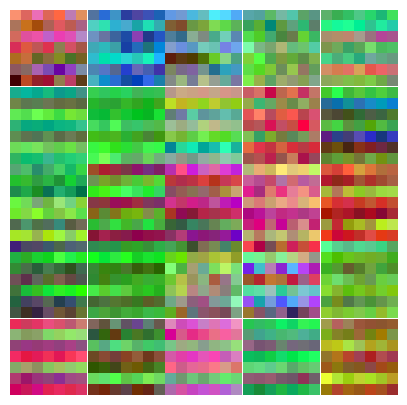

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3054743568916387
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.4509599208831787
Iteration 0 , Loss:  5.905251534270381
Training accuracy:  0.05 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  0.38629627227783203
Iteration 0 , Loss:  5.110055282428857
Training accuracy:  0.2 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 2 in seconds:  0.32820892333984375
Iteration 0 , Loss:  3.3804735261494048
Training accuracy:  0.35 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 3 in seconds:  0.30065035820007324
Iteration 0 , Loss:  2.044285790723648
Training accuracy:  0.2 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 4 in seconds:  0.33689403533935547
Iteration 0 , Loss:  1.584417568371897
Training accuracy:  0.2 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 5 in seconds:

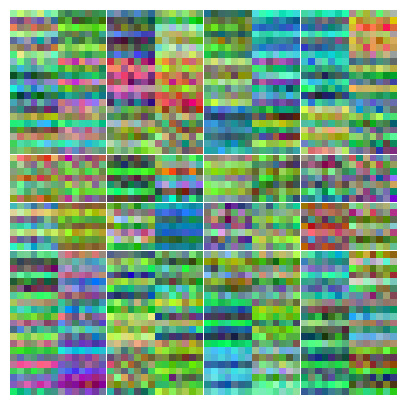

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.305160887095468
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 0 in seconds:  0.6720879077911377
Iteration 0 , Loss:  8.34808418718061
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  0.7866463661193848
Iteration 0 , Loss:  4.4816719362901445
Training accuracy:  0.25 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 2 in seconds:  0.6166856288909912
Iteration 0 , Loss:  3.7286471829009415
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 3 in seconds:  0.5393223762512207
Iteration 0 , Loss:  1.7516020473454392
Training accuracy:  0.4 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 4 in seconds:  0.46579575538635254
Iteration 0 , Loss:  1.6222989006569932
Training accuracy:  0.35 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in seconds:

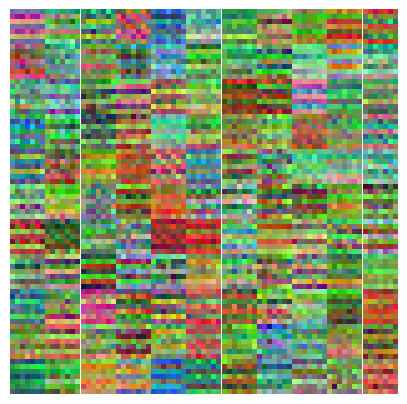

In [28]:
net1 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_kers=(8,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net1.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam1, train_acc_history_adam1, val_acc_adam1 = net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net1.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters1.png')

net2 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_kers=(16,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net2.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam2, train_acc_history_adam2, val_acc_adam2 = net2.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net2.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters2.png')

net3 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_kers=(32,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net3.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam3, train_acc_history_adam3, val_acc_adam3 = net3.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net3.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters3.png')

net4 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_kers=(64,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net4.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam4, train_acc_history_adam4, val_acc_adam4 = net4.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net4.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters4.png')

net5 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_kers=(128,), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net5.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam5, train_acc_history_adam5, val_acc_adam5 = net5.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=20, acc_freq=2, print_every=6)
plot_weights(net5.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters5.png')


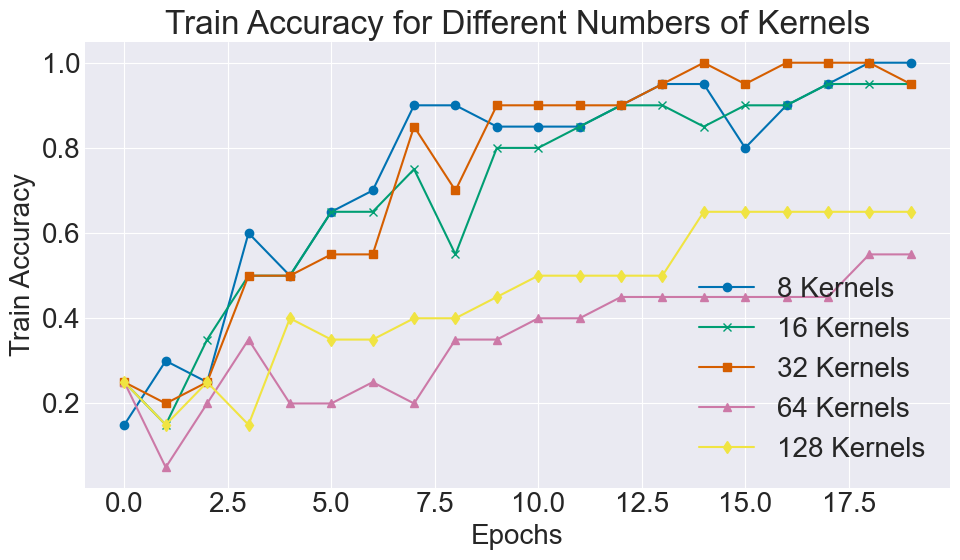

In [29]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the validation accuracy for each network
plt.plot(train_acc_history_adam1, label="8 Kernels", linestyle='-', marker='o')
plt.plot(train_acc_history_adam2, label="16 Kernels", linestyle='-', marker='x')
plt.plot(train_acc_history_adam3, label="32 Kernels", linestyle='-', marker='s')
plt.plot(train_acc_history_adam4, label="64 Kernels", linestyle='-', marker='^')
plt.plot(train_acc_history_adam5, label="128 Kernels", linestyle='-', marker='d')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy for Different Numbers of Kernels')
plt.legend(loc='lower right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


As the number of kernels increases, there is less fluctuation in the training accuracies achieved, but the maximum accuracy achieved is much lower. This suggests that increasing the number of kernels beyond a certain point (in this case, 32 kernels) may lead to diminishing returns or even hinder the performance, likely due to overfitting or optimization difficulties.

### Adagrad (Adaptive Gradient Descent) Deep Learning Optimizer

Sources: 

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#Adagrad_(Adaptive_Gradient_Descent)_Deep_Learning_Optimizer

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

Adagrad adapts the learning rate for each parameter by accumulating squared gradients over time, making it effective for sparse data or feature. The benefit of using Adagrad is that it abolishes the need to modify the learning rate manually. It is more reliable than gradient descent algorithms and their variants, and it reaches convergence at a higher speed. A key downside of Adagrad is its aggressively decreasing learning rate, which becomes extremely small over time as the accumulated squared gradients grow. This eventually hinders the model's ability to learn further, compromising accuracy.

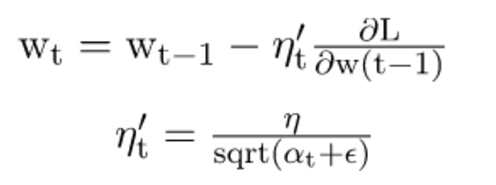

In [ ]:
from optimizer import *

In [35]:

rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

# Test Adagrad
optimizer = Adagrad(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adagrad: Wts after 1 iter\n{new_wts_1}')
print(f'Adagrad: Wts after 2 iter\n{new_wts_2}')
print(f'Adagrad: Wts after 3 iter\n{new_wts_3}')
print(45*'-')

# Test Adam
optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')
print(45*'-')

# Test AdamW (without regularization)
optimizer = AdamW(lr=0.1, reg = 0)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'AdamW: Wts after 1 iter\n{new_wts_1}')
print(f'AdamW: Wts after 2 iter\n{new_wts_2}')
print(f'AdamW: Wts after 3 iter\n{new_wts_3}')
print(45*'-')


Adagrad: Wts after 1 iter
[[ 0.2257302 -0.0321049  0.7404226  0.2049001]
 [-0.4356694  0.4615951  1.204      0.847081 ]
 [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
Adagrad: Wts after 2 iter
[[ 0.2964409  0.0386058  0.8111333  0.2756108]
 [-0.3649587  0.5323057  1.1332894  0.7763703]
 [-0.5330246 -1.4361321 -0.4525638 -0.1293847]]
Adagrad: Wts after 3 iter
[[ 0.3541759  0.0963408  0.8688684  0.3333458]
 [-0.3072237  0.5900408  1.0755543  0.7186353]
 [-0.4752895 -1.4938672 -0.3948288 -0.1871197]]
---------------------------------------------
Adam: Wts after 1 iter
[[ 0.4541759  0.1963408  0.9688684  0.4333458]
 [-0.2072237  0.6900408  0.9755543  0.6186353]
 [-0.3752896 -1.5938672 -0.2948288 -0.2871197]]
Adam: Wts after 2 iter
[[ 0.5541759  0.2963408  1.0688684  0.5333458]
 [-0.1072237  0.7900407  0.8755543  0.5186353]
 [-0.2752896 -1.6938672 -0.1948288 -0.3871197]]
Adam: Wts after 3 iter
[[ 0.6541759  0.3963408  1.1688684  0.6333458]
 [-0.0072237  0.8900407  0.7755544  0.4186353]
 [-

In each epoch, the number of iterations is 23
acc_frq is 50
Iteration 0 , Loss:  2.3026670426419633
Training accuracy:  0.1107470511140236 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  12.381257057189941
Iteration 0 , Loss:  1.9284423892971003
Training accuracy:  0.28309305373525556 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  10.273088693618774
Iteration 0 , Loss:  1.8077542982657198
Training accuracy:  0.30930537352555704 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 2 in seconds:  9.344049215316772
Iteration 0 , Loss:  1.764991646264833
Training accuracy:  0.3658802970729576 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 3 in seconds:  9.553401470184326
Iteration 0 , Loss:  1.6773075997678217
Training accuracy:  0.39580602883355176 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 4 in seconds:  8.796537637710571
Total training time in seconds:  115.39825463294983
In each epoch,

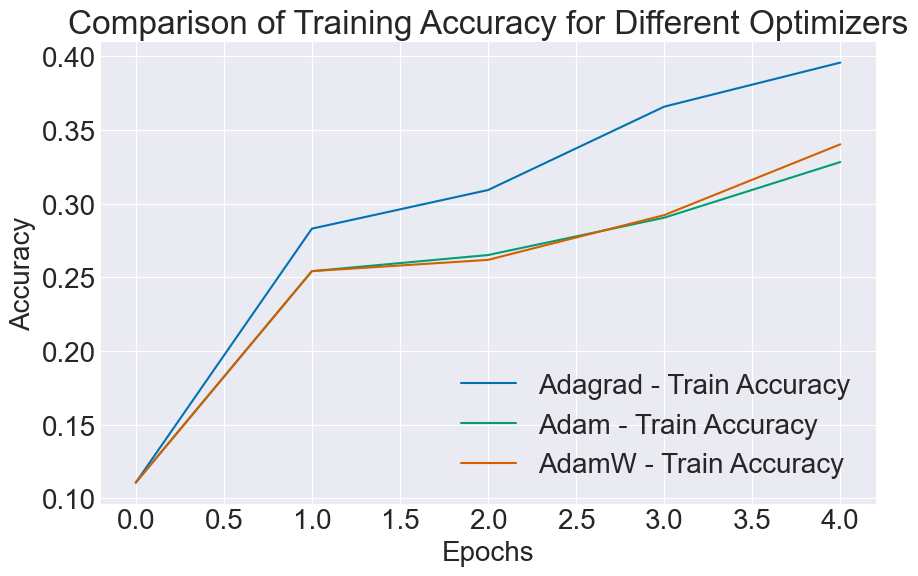

In [42]:
# Adagrad
adagrad_net = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.5, r_seed=0)
adagrad_net.compile(optimizer_name='adagrad', lr=1e-2)
loss_history_adagrad, train_acc_history_adagrad, val_acc_adagrad = adagrad_net.fit(x_train, y_train, x_val, y_val, mini_batch_sz=200, n_epochs=5, acc_freq=50, print_every=100)

# Adam
adam_net = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.5, r_seed=0)
adam_net.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam, train_acc_history_adam, val_acc_adam = adam_net.fit(x_train, y_train, x_val, y_val, mini_batch_sz=200, n_epochs=5, acc_freq=50, print_every=100)

# AdamW
adamw_net = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.5, r_seed=0)
adamw_net.compile(optimizer_name='adamw', lr=1e-2, reg=0.0)
loss_history_adamw, train_acc_history_adamw, val_acc_adamw = adamw_net.fit(x_train, y_train, x_val, y_val, mini_batch_sz=200, n_epochs=5, acc_freq=50, print_every=100)

# Plot the training and validation accuracies for each optimizer
plt.figure(figsize=(10, 6))

# Adagrad
plt.plot(train_acc_history_adagrad, label="Adagrad - Train Accuracy")

# Adam
plt.plot(train_acc_history_adam, label="Adam - Train Accuracy")

# AdamW
plt.plot(train_acc_history_adamw, label="AdamW - Train Accuracy")

plt.title("Comparison of Training Accuracy for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.show()


It is importabnt to keep in mind that this is only over 5 epochs and this is training accuracy. Adagrad's adaptive learning rate helps it make significant progress early in the training phase, especially for sparse features or gradients that initially have high variance. However, I expect that if we trained over more epochs, Adagrad's performance might plateau due to its diminishing learning rate, which can hinder its ability to make further progress once the updates become too small.